In [1]:
import numpy as np
import pandas as pd

from tvDatafeed import TvDatafeed, Interval

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import time

In [2]:
tv = TvDatafeed()

# portfolio of stocks
# FPMARKETS:US100
# CAPITALCOM:US500
# FOREXCOM:US30
oex = ['US100', 'US500', 'US30']

num_stocks = len(oex)

start_date = datetime(2015, 1, 1)
today = datetime.now()

days_difference = (today - start_date).days

n_bars = min(days_difference + 100, 5000)  # max 5000 API limit

# stocks and their exchanges
stock_exchanges = {
    'US100': 'FPMARKETS',
    'US500': 'CAPITALCOM',
    'US30': 'FOREXCOM'
}

# function to download data with retries
def download_with_retry(symbol, exchange, retries=3, delay=2):
    for attempt in range(retries):
        try:
            print(f"Downloading {symbol} from {exchange} (attempt {attempt+1})")
            data = tv.get_hist(
                symbol=symbol, 
                exchange=exchange, 
                interval=Interval.in_daily,
                n_bars=1000  # circa 4 anni di dati
            )
            if data is not None and not data.empty:
                print(f"✅ {symbol}: {len(data)} rows downloaded")
                return data
        except Exception as e:
            print(f"❌ Error downloading {symbol}: {e}")
        
        if attempt < retries - 1:
            time.sleep(delay)
    
    print(f"❌ Failed to download {symbol} after {retries} attempts")
    return None

# Download data for all stocks
print("🚀 Starting data download...")
data_dict = {}
failed_downloads = []

for stock, exchange in stock_exchanges.items():
    data = download_with_retry(stock, exchange)
    if data is not None:
        data_dict[stock] = data['close']
    else:
        failed_downloads.append(stock)

if failed_downloads:
    print(f"⚠️ Failed to download: {failed_downloads}")

# Combine into a single DataFrame
if data_dict:
    df = pd.DataFrame(data_dict)
    print(f"📊 Combined DataFrame shape: {df.shape}")
    print(f"📅 Date range: {df.index.min()} to {df.index.max()}")
    print("\nFirst 5 rows:")
    print(df.head())
else:
    print("❌ No data downloaded successfully")

you are using nologin method, data you access may be limited


🚀 Starting data download...
✅ US100: 1000 rows downloaded
✅ US500: 1000 rows downloaded
✅ US30: 1000 rows downloaded
📊 Combined DataFrame shape: (2001, 3)
📅 Date range: 2021-07-14 01:00:00 to 2025-09-11 01:00:00

First 5 rows:
                       US100  US500  US30
datetime                                 
2021-07-14 01:00:00  14781.5    NaN   NaN
2021-07-15 01:00:00  14676.7    NaN   NaN
2021-07-19 01:00:00  14733.4    NaN   NaN
2021-07-20 01:00:00  14848.2    NaN   NaN
2021-07-21 01:00:00  14989.1    NaN   NaN


<Axes: title={'center': 'US100 Closing Prices'}, xlabel='datetime'>

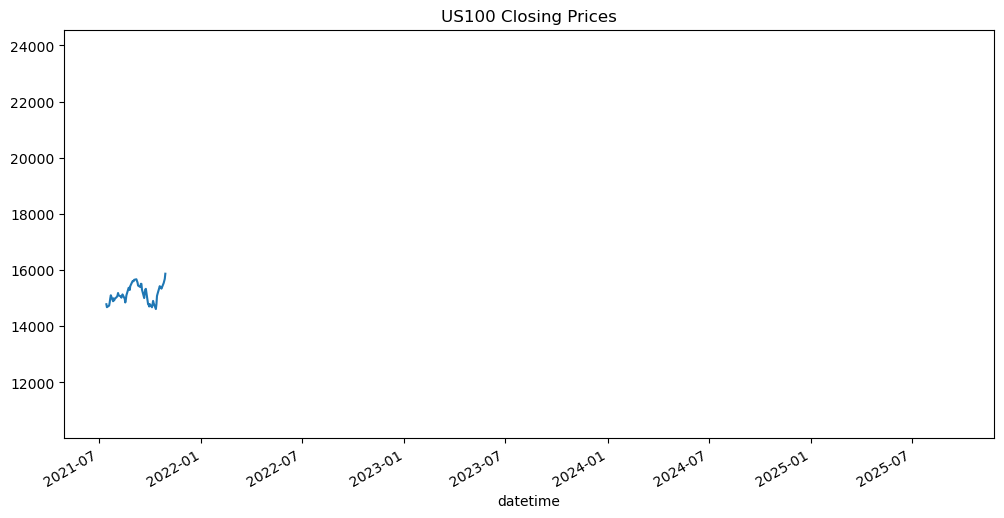

In [8]:
# plot US100
df.US100.plot(title='US100 Closing Prices', figsize=(12, 6))

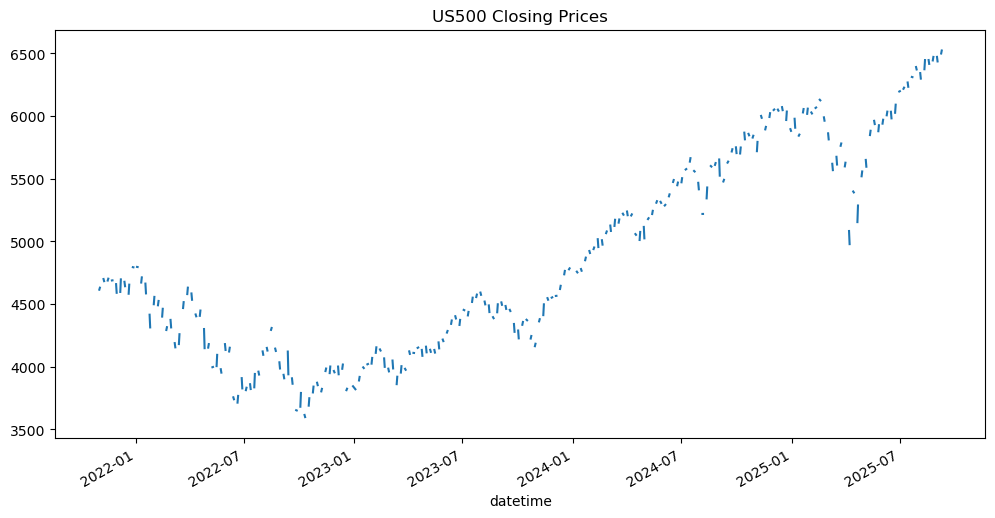

In [10]:
# plot US500
df.US500.plot(title='US500 Closing Prices', figsize=(12, 6));

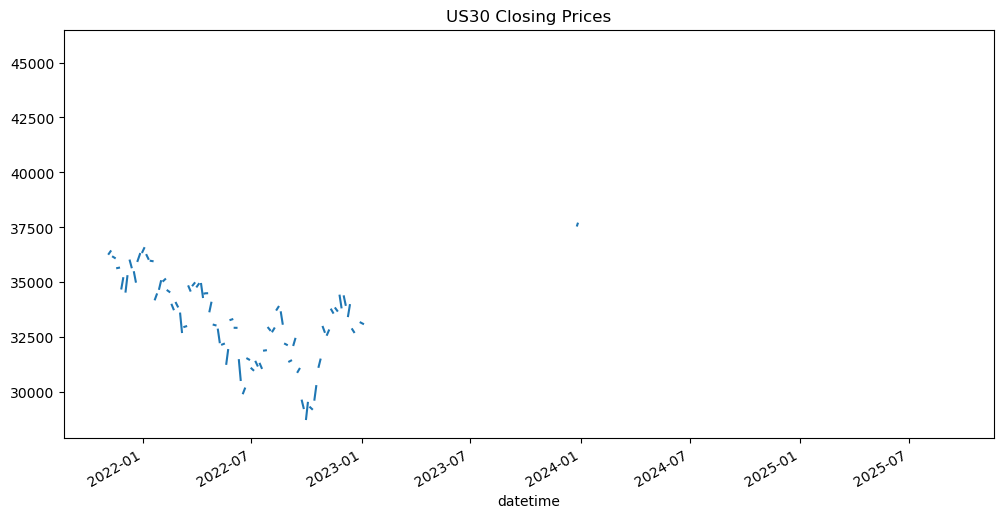

In [11]:
# plot US30
df.US30.plot(title='US30 Closing Prices', figsize=(12, 6));